In [88]:
# Enter your name here
# Tarun Gunampalli

In [89]:
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

In [90]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'1.5.2'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe!
* Also, set the `skipinitialspace` parameter to `True`. (This will be necessary for the `map()` function to work later in the assignment.)

In [91]:
# your code goes here
adult_data = pd.read_csv('adult.csv', na_values=['?'], skipinitialspace=True)

adult_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,54.0,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [92]:
# your code goes here
adult_data.isnull().sum().sum()

4290

Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `workclass` or `occupation`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [93]:
# your code goes here
adult_data.dropna(subset=['workclass', 'occupation'], inplace=True)
adult_data['native-country'].fillna(method='ffill', inplace=True)

adult_data[['workclass', 'occupation', 'native-country']].isnull().sum().sum()

0

Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income? 
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

In [94]:
# your code goes here
total = adult_data.shape[0]

print("{0:.4%}".format(adult_data[adult_data['income'] == '<=50K'].shape[0] / total), 'of people in the dataset make <= 50K')
print("{0:.4%}".format(adult_data[adult_data['income'] == '>50K'].shape[0] / total), 'of people in the dataset make >50K')

print("{0:.4%}".format(adult_data[adult_data['sex'] == 'Male'].shape[0] / total), 'of people in the dataset are males')
print("{0:.4%}".format(adult_data[adult_data['sex'] == 'Female'].shape[0] / total), 'of people in the dataset are females')

75.0960% of people in the dataset make <= 50K
24.9040% of people in the dataset make >50K
67.6737% of people in the dataset are males
32.3263% of people in the dataset are females


<AxesSubplot:title={'center':'Education Distribution'}, ylabel='Frequency'>

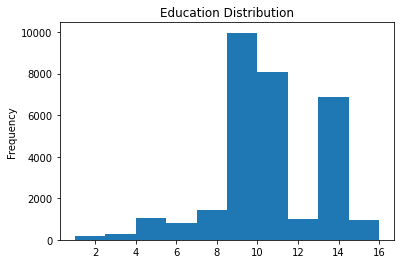

In [95]:
adult_data['education-num'].plot(kind='hist', title='Education Distribution')

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

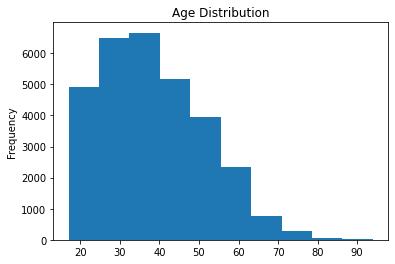

In [96]:
adult_data['age'].plot(kind='hist', title='Age Distribution')

Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

<AxesSubplot:>

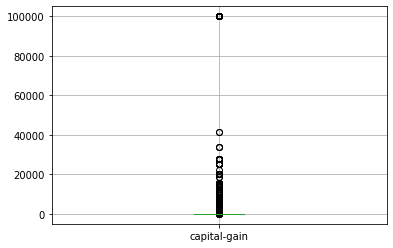

In [97]:
# your code goes here
adult_data.boxplot(column='capital-gain')

# Since the vast majority of the people in this dataset have a capital gain of 0 such that the median of the upper half
# of all values is still 0, I would consider any capital gain that isn't 0 to be an outlier.

Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [98]:
# your code goes here
adult_data.groupby('marital-status')['age'].mean().sort_values()

marital-status
Never-married            28.471218
Married-AF-spouse        31.250000
Separated                39.507821
Married-spouse-absent    40.290488
Married-civ-spouse       42.770487
Divorced                 42.896333
Widowed                  57.742857
Name: age, dtype: float64

Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. Display the head of the dataframe.

In [99]:
# your code goes here
median_age_by_ms = adult_data.groupby('marital-status')['age'].transform('median')
adult_data['age'].fillna(median_age_by_ms, inplace=True)
adult_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q8. Display everyone who is over 90 years old.  

In [100]:
# your code goes here
adult_data[adult_data['age'] > 90]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,91.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
5272,94.0,Private,High-school,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32277,91.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,93.0,Local-gov,Elem-school,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

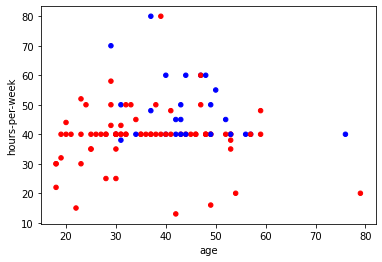

In [101]:
# your code goes here
colors={'<=50K': 'red', '>50K': 'blue'}
head = adult_data.head(100)

head.plot(kind='scatter', x='age', y='hours-per-week', c=head['income'].apply(lambda i: colors[i]))

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [102]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [103]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()

# add the new column to adult_data_copy
# your code goes here
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)

Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

C:\Users\tarun\AppData\Local\Temp\ipykernel_42000\1459109077.py:9: FutureWarning: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  adult_data_copy.groupby('continent').agg([np.mean, np.std])


age            education-num           capital-gain  \
                    mean        std          mean       std         mean   
continent                                                                  
Asia           38.235376  11.721383     11.232591  3.018344  1481.420613   
Europe         41.520958  13.270345     10.259481  3.122905   697.023952   
North-America  38.393108  13.140268     10.105053  2.532169  1107.917932   
South-America  38.496241  13.332930      9.270677  2.758260   204.962406   

                           capital-loss             hours-per-week             
                       std         mean         std           mean        std  
continent                                                                      
Asia           9472.305036   112.554318  455.948166      41.047354  12.112351  
Europe         2763.267845    72.828343  372.019637      42.039920  12.679842  
North-America  7514.704148    88.747770  405.195024      40.938092  11.977528  
South-America  1026.541446    57.714286  332.235121      38.789474   9.898770

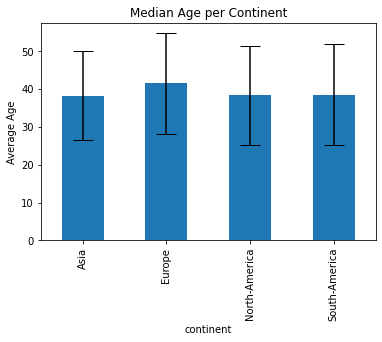

In [104]:
# your code goes here
adult_data_copy.groupby('continent')['age'].mean()
adult_data_copy.groupby('continent')['age'].std()

bar_data = pd.merge(adult_data_copy.groupby('continent')['age'].mean(), adult_data_copy.groupby('continent')['age'].std(), left_index=True, right_index=True)
bar_data.rename(columns={'age_x': 'age', 'age_y': 'std'}, inplace=True)
bar_data.plot(kind='bar', yerr='std', capsize=10, legend=False, title="Median Age per Continent", ylabel='Average Age')

adult_data_copy.groupby('continent').agg([np.mean, np.std])

Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [105]:
'''Explain here (as a comment):
We can get rid of the capital gain and capital loss attributes since those are almost completely the same among all entries
in the dataset and we are already considering any nonzero values to be outliers. Also, since we already extracted out the
continents from the native country feature, we might be able to get rid of the native country feature if we only wanted
the continents.
'''

'Explain here (as a comment):\nWe can get rid of the capital gain and capital loss attributes since those are almost completely the same among all entries\nin the dataset and we are already considering any nonzero values to be outliers. Also, since we already extracted out the\ncontinents from the native country feature, we might be able to get rid of the native country feature if we only wanted\nthe continents.\n'

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [106]:
# your code goes here
leaf_data = pd.read_csv('leaf.csv')
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


In [107]:
for (cName, cData) in leaf_data.iteritems():
    print(cName, leaf_data['eccentricity'].corr(leaf_data[cName]))

class 0.6975158445048066
eccentricity 1.0
aspect-ratio 0.8494165996563308
elongation 0.6347074225595533
solidity 0.33141242100700696
stochastic-convexity 0.3150531948617837
isoperimetric-factor -0.2930612593099092
maximal-indentation-depth -0.3356326404493101
lobedness -0.3779755197593556
average-intensity -0.3677744675062588
average-contrast -0.43276761905846306
smoothness -0.3829810169595544
third-moment -0.4035661208164642
uniformity -0.2644535716461317
entropy -0.41652969707205684


C:\Users\tarun\AppData\Local\Temp\ipykernel_42000\1744114104.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (cName, cData) in leaf_data.iteritems():


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [108]:
# From the above correlations, we can see that the aspect-ratio feature has a high correlation with the eccentricity feature, so we can group the entries
# by the aspect-ratios, take the mean of each group, and use those to fill in missing eccentricity values

# your code goes here
eccentricity_by_ar = leaf_data['eccentricity'].groupby(pd.qcut(leaf_data['aspect-ratio'], 8)).transform('mean')
leaf_data['eccentricity'].fillna(eccentricity_by_ar, inplace=True)
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.340805,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [109]:
# your code goes here
scaler = StandardScaler()
scaled_leaf_data = pd.DataFrame(scaler.fit_transform(leaf_data), columns=leaf_data.columns)
print(scaled_leaf_data.mean(), scaled_leaf_data.std())
scaled_leaf_data.head()

class                       -4.483593e-17
eccentricity                -2.610092e-16
aspect-ratio                -5.337611e-18
elongation                   3.095814e-16
solidity                     7.301851e-16
stochastic-convexity         5.316260e-16
isoperimetric-factor         1.313052e-16
maximal-indentation-depth    1.558582e-16
lobedness                    1.067522e-16
average-intensity           -2.049643e-16
average-contrast            -4.611696e-16
smoothness                   4.270089e-17
third-moment                -1.195625e-16
uniformity                   3.416071e-17
entropy                     -3.416071e-17
dtype: float64 class                        1.009756
eccentricity                 1.009756
aspect-ratio                 1.009756
elongation                   1.009756
solidity                     1.009756
stochastic-convexity         1.009756
isoperimetric-factor         1.009756
maximal-indentation-depth    1.009756
lobedness                    1.009756
average-inten

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,-1.196975,-0.899622,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.470569,1.707424,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,0.581388,-1.489053,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-1.196975,-0.177193,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,0.581388,-0.932553,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [110]:
# your code goes here
pca = PCA(n_components=0.95, svd_solver='full')
pca_data = pd.DataFrame(pca.fit_transform(scaled_leaf_data))
pca_data.head()

,0,1,2,3
0,-1.804776,-1.993495,0.094553,0.195306
1,-1.361294,3.247580,-1.224232,-0.232016
2,2.406629,-0.220323,0.505800,1.136448
3,-2.656083,-2.445039,-0.458531,-0.234456
4,4.906326,-1.128983,-1.211720,-0.136175
